
# Ex 7. Structure-Constrained Time-Lapse Resistivity Inversion

This example combines structural constraints with time-lapse ERT inversion
to monitor water content changes in layered geological media.

The workflow demonstrates:
1. Loading meshes with geological structure from seismic interpretation
2. Time-lapse ERT inversion with structural constraints
3. Converting resistivity to water content using layer-specific petrophysics
4. Uncertainty quantification through Monte Carlo analysis
5. Time series analysis of water content at specific locations

This advanced approach provides the most reliable estimates of subsurface
water content evolution by combining temporal, spatial, and geological
constraints in the inversion process.


In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Setup package path for development
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()

# Add the parent directory to Python path
parent_dir = os.path.dirname(current_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import PyHydroGeophysX modules
from PyHydroGeophysX.inversion.time_lapse import TimeLapseERTInversion
from PyHydroGeophysX.inversion.windowed import WindowedTimeLapseERTInversion

In [2]:
data_dir = "C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/results/TL_measurements/appres"

# List of ERT data files testing monthly time-lapse inversion
ert_files = [
    "synthetic_data30.dat",
    "synthetic_data60.dat",
    "synthetic_data90.dat",
    "synthetic_data120.dat",
    "synthetic_data150.dat",
    "synthetic_data180.dat",
    "synthetic_data210.dat",
    "synthetic_data240.dat",
    "synthetic_data270.dat",
    "synthetic_data300.dat",
    "synthetic_data330.dat",
    "synthetic_data360.dat",
]


# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(os.path.join(data_dir, ert_files[0]))
ert_manager = ert.ERTManager(data)
mesh_with_interface = pg.load("C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/results/Structure_WC/mesh_with_interface.bms")

In [3]:
# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Define the window size (number of timesteps to process together)
window_size = 3  # A window size of 3 means each window includes 3 consecutive measurements

# Create the windowed time-lapse inversion object
inversion = WindowedTimeLapseERTInversion(
    data_dir=data_dir,               # Directory containing ERT data files
    ert_files=ert_files,             # List of ERT data filenames
    measurement_times=measurement_times,  # List of measurement times
    window_size=window_size,         # Size of sliding window
    mesh=mesh_with_interface,                       # Mesh for inversion
    **inversion_params               # Pass the same inversion parameters
)

# Run the inversion, optionally in parallel
print("Starting windowed time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")

Starting windowed time-lapse inversion...

Processing 10 windows sequentially...
Using L2 inversion

Starting L2 inversion for window 0


23/05/25 - 12:25:18 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 12:25:18 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 12:25:18 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 12:25:18 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 12:25:18 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 12:25:18 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 12:25:19 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 12:25:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 12:25:19 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 12:25:58 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 12:25:59 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 12:25:59 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


23/05/25 - 12:26:36 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 12:26:36 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 12:26:36 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


ERT chi2: 2615.203190716277
dPhi: 1.0
ERTphi_d: 6496164.725739231, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 38.7872420873047
dPhi: 0.9851685550763338
ERTphi_d: 96347.50934486487, ERTphi_m: 3907.5398221862633, ERTphi_t: 1749.4500769988747


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 19.686447938225225
dPhi: 0.4924504326986239
ERTphi_d: 48901.136678551455, ERTphi_m: 1529.9175011931475, ERTphi_t: 1601.058203137823


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.946651812239915
dPhi: 0.44394987625041415
ERTphi_d: 27191.48310160395, ERTphi_m: 902.4777299121217, ERTphi_t: 1588.2538149237018


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.727945896457196
dPhi: 0.8421484554277038
ERTphi_d: 4292.217606799675, ERTphi_m: 784.5223275423086, ERTphi_t: 1572.782723102875


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.20982629710736
dPhi: 0.2998471192947278
ERTphi_d: 3005.208522014682, ERTphi_m: 713.1213451248284, ERTphi_t: 1572.7437638298607
Convergence reached at iteration 5


End of inversion

Window 0 results:
Model shape: (4529, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 1


23/05/25 - 12:54:03 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 12:54:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 12:54:03 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 12:54:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 12:54:03 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 12:54:03 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 12:54:03 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 12:54:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 12:54:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 12:54:44 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 12:54:44 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 12:54:44 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


23/05/25 - 12:55:23 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 12:55:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 12:55:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


ERT chi2: 2425.1009280846456
dPhi: 1.0
ERTphi_d: 6023950.705362259, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 33.99837327694347
dPhi: 0.9859806357404698
ERTphi_d: 84451.95921992758, ERTphi_m: 3511.908099219132, ERTphi_t: 214.07201825887228


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 20.27737665105712
dPhi: 0.4035780333993643
ERTphi_d: 50369.003601225886, ERTphi_m: 1228.1849837339141, ERTphi_t: 189.62855679692268


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.172129529130475
dPhi: 0.4983508121303171
ERTphi_d: 25267.5697503601, ERTphi_m: 652.0953432124884, ERTphi_t: 168.17473054796665


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.5601747432505049
dPhi: 0.8466226035774959
ERTphi_d: 3875.4740622342542, ERTphi_m: 528.3748595914157, ERTphi_t: 166.04283548411843


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.040801587090379
dPhi: 0.3328942212447636
ERTphi_d: 2585.3511423325017, ERTphi_m: 459.63344708397756, ERTphi_t: 167.43570956967346
Convergence reached at iteration 5


End of inversion

Window 1 results:
Model shape: (4529, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 2

23/05/25 - 13:22:54 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 13:22:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 13:22:54 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 13:22:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 13:22:54 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 13:22:54 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 13:22:54 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 13:22:55 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 13:22:55 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 13:23:37 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 13:23:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 13:23:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


23/05/25 - 13:24:15 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 13:24:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 13:24:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


ERT chi2: 2361.5909321875547
dPhi: 1.0
ERTphi_d: 5866191.8755538855, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 32.782468089183965
dPhi: 0.9861184815531039
ERTphi_d: 81431.65073353297, ERTphi_m: 3459.6538344050145, ERTphi_t: 293.43198891567596


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 20.702578241171217
dPhi: 0.36848628404516953
ERTphi_d: 51425.204351069304, ERTphi_m: 1192.0133342752167, ERTphi_t: 278.75094206530093


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.311176174934074
dPhi: 0.5019375821303147
ERTphi_d: 25612.96161853624, ERTphi_m: 646.0649574919518, ERTphi_t: 261.5742720378148


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.708029816418048
dPhi: 0.8343516018502158
ERTphi_d: 4242.746063982431, ERTphi_m: 523.2899364256285, ERTphi_t: 255.3644185240111


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.1142886342003364
dPhi: 0.3476175746526844
ERTphi_d: 2767.892967353636, ERTphi_m: 463.4735619497734, ERTphi_t: 257.01706882737085
Convergence reached at iteration 5


End of inversion

Window 2 results:
Model shape: (4529, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 3

23/05/25 - 13:52:23 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 13:52:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 13:52:23 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 13:52:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 13:52:23 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 13:52:23 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 13:52:24 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 13:52:24 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 13:52:24 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 13:53:10 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 13:53:10 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 13:53:10 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


23/05/25 - 13:53:51 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 13:53:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 13:53:51 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


ERT chi2: 2335.6986437992678
dPhi: 1.0
ERTphi_d: 5801875.431197381, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 32.9294137219743
dPhi: 0.9859016856436534
ERTphi_d: 81796.66368538416, ERTphi_m: 3393.726782849587, ERTphi_t: 264.759691323182


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 21.435174052310423
dPhi: 0.34905691813133
ERTphi_d: 53244.97234593909, ERTphi_m: 1145.770460010107, ERTphi_t: 251.76406092631737


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 11.142159443102997
dPhi: 0.4801927236087909
ERTphi_d: 27677.124056667846, ERTphi_m: 630.2513635826859, ERTphi_t: 235.56448624002712


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.826522295380038
dPhi: 0.8360710682065624
ERTphi_d: 4537.081381724014, ERTphi_m: 490.8483391028681, ERTphi_t: 230.77152047777759


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.0734435336459234
dPhi: 0.4123019815520096
ERTphi_d: 2666.4337375764735, ERTphi_m: 435.55758872517356, ERTphi_t: 231.25663602341717
Convergence reached at iteration 5


End of inversion

Window 3 results:
Model shape: (4529, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 4


23/05/25 - 14:22:10 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 14:22:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 14:22:10 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 14:22:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 14:22:10 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 14:22:10 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 14:22:11 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 14:22:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 14:22:11 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 14:22:56 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 14:22:56 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 14:22:56 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


23/05/25 - 14:23:35 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 14:23:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 14:23:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


ERT chi2: 2119.8334751763696
dPhi: 1.0
ERTphi_d: 5265666.352338102, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 31.373495330258912
dPhi: 0.9852000189176895
ERTphi_d: 77931.76240036314, ERTphi_m: 3372.6573833240936, ERTphi_t: 1999.107958982754


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 21.196405957115125
dPhi: 0.3243849391345392
ERTphi_d: 52651.87239747397, ERTphi_m: 1224.3877360562228, ERTphi_t: 1861.8160158419823


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 10.572130281019763
dPhi: 0.5012300527547241
ERTphi_d: 26261.171618053093, ERTphi_m: 780.6837170020981, ERTphi_t: 1804.2686836967755


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 2.0944847100634876
dPhi: 0.8018862183505501
ERTphi_d: 5202.700019797703, ERTphi_m: 642.1108471565356, ERTphi_t: 1774.5835648218258


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.2164644002284128
dPhi: 0.41920588181732793
ERTphi_d: 3021.6975701673773, ERTphi_m: 597.1083280141618, ERTphi_t: 1767.5692891193125
Convergence reached at iteration 5


End of inversion

Window 4 results:
Model shape: (4529, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 5


23/05/25 - 14:52:04 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 14:52:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 14:52:04 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 14:52:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 14:52:04 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 14:52:04 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 14:52:05 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 14:52:05 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 14:52:05 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 14:52:49 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 14:52:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 14:52:49 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


23/05/25 - 14:53:32 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 14:53:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 14:53:32 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


ERT chi2: 1950.9770278267108
dPhi: 1.0
ERTphi_d: 4846226.93712155, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 30.934239463230924
dPhi: 0.9841442318274296
ERTphi_d: 76840.65082666562, ERTphi_m: 3225.2682634607336, ERTphi_t: 1982.9319447291757


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 20.100882759260458
dPhi: 0.35020601417556163
ERTphi_d: 49930.59277400297, ERTphi_m: 1171.2937861713922, ERTphi_t: 1869.3707080633644


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 8.935523826803973
dPhi: 0.5554660989857579
ERTphi_d: 22195.841185781068, ERTphi_m: 733.2144456862547, ERTphi_t: 1841.8807049215752


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.8890389184653738
dPhi: 0.788592257703034
ERTphi_d: 4692.3726734679885, ERTphi_m: 600.3186557890818, ERTphi_t: 1811.6924691161908


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.1899204467036115
dPhi: 0.3700921484083109
ERTphi_d: 2955.762389611771, ERTphi_m: 554.6929501948996, ERTphi_t: 1806.683235746204
Convergence reached at iteration 5


End of inversion

Window 5 results:
Model shape: (4529, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 6


23/05/25 - 15:21:51 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 15:21:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 15:21:51 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 15:21:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 15:21:51 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 15:21:51 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 15:21:51 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 15:21:51 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 15:21:52 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 15:22:37 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 15:22:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 15:22:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


23/05/25 - 15:23:20 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 15:23:20 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 15:23:20 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


ERT chi2: 1883.9060365558214
dPhi: 1.0
ERTphi_d: 4679622.59480466, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 34.23015357996252
dPhi: 0.981830222465584
ERTphi_d: 85027.7014926269, ERTphi_m: 3097.2773234407177, ERTphi_t: 1335.976669247848


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 19.436690659697497
dPhi: 0.43217635251641834
ERTphi_d: 48280.73959868858, ERTphi_m: 1130.0986689230533, ERTphi_t: 1220.9828219098335


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 8.70651501380176
dPhi: 0.5520577465455602
ERTphi_d: 21626.98329428357, ERTphi_m: 690.624004798103, ERTphi_t: 1188.9589452592577


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.7475230844470118
dPhi: 0.7992855830746516
ERTphi_d: 4340.847341766377, ERTphi_m: 560.2488543601182, ERTphi_t: 1162.9305578930348


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.1589076613974425
dPhi: 0.3368284106162932
ERTphi_d: 2878.7266309112474, ERTphi_m: 514.1188863895743, ERTphi_t: 1164.0310145826106
Convergence reached at iteration 5


End of inversion

Window 6 results:
Model shape: (4529, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 7


23/05/25 - 15:52:14 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 15:52:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 15:52:14 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 15:52:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 15:52:14 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 15:52:14 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 15:52:14 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 15:52:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 15:52:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 15:53:01 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 15:53:01 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 15:53:01 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


23/05/25 - 15:53:42 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 15:53:42 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 15:53:42 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


ERT chi2: 2081.2715290469173
dPhi: 1.0
ERTphi_d: 5169878.478152542, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 40.00161712123052
dPhi: 0.9807802026006917
ERTphi_d: 99364.0169291366, ERTphi_m: 3246.4013620903347, ERTphi_t: 1399.656811839592


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 18.778813315965287
dPhi: 0.5305486460946452
ERTphi_d: 46646.572276857776, ERTphi_m: 1222.9371941793931, ERTphi_t: 1262.8867231059526


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 9.38610717865019
dPhi: 0.5001757022276614
ERTphi_d: 23315.090231767073, ERTphi_m: 720.456211263077, ERTphi_t: 1200.3773811364272


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.705099556294318
dPhi: 0.8183379409759173
ERTphi_d: 4235.467297835086, ERTphi_m: 609.4675797548607, ERTphi_t: 1181.78830939784


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.182619325668223
dPhi: 0.30642212573299715
ERTphi_d: 2937.626404959866, ERTphi_m: 558.1966611866691, ERTphi_t: 1182.579119551724
Convergence reached at iteration 5


End of inversion

Window 7 results:
Model shape: (4529, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 8


23/05/25 - 16:22:18 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 16:22:18 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 16:22:18 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 16:22:18 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 16:22:18 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 16:22:18 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 16:22:19 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 16:22:19 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 16:22:19 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 16:23:06 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 16:23:06 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 16:23:06 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


23/05/25 - 16:23:49 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 16:23:49 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 16:23:50 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


ERT chi2: 2340.2854558258423
dPhi: 1.0
ERTphi_d: 5813269.072271392, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 44.26529053397118
dPhi: 0.9810855165450957
ERTphi_d: 109954.98168638442, ERTphi_m: 3445.501849224727, ERTphi_t: 631.1615889260861


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 19.62859274543614
dPhi: 0.556569210127012
ERTphi_d: 48757.424379663375, ERTphi_m: 1300.6009580453147, ERTphi_t: 580.1064168316179


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 11.149992385979177
dPhi: 0.4319515142739069
ERTphi_d: 27696.581086772276, ERTphi_m: 740.5983869813889, ERTphi_t: 577.5629528379034


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.7836700432632742
dPhi: 0.8400294832930835
ERTphi_d: 4430.636387465973, ERTphi_m: 630.2498059252589, ERTphi_t: 568.0656553195433


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.1504012199105402
dPhi: 0.355036978809237
ERTphi_d: 2857.596630257782, ERTphi_m: 565.9672084104744, ERTphi_t: 567.2208566144889
Convergence reached at iteration 5


End of inversion

Window 8 results:
Model shape: (4529, 3)
Coverage available: True
Number of iterations: 6



Starting L2 inversion for window 9


23/05/25 - 16:53:00 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 16:53:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 16:53:00 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 16:53:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 16:53:00 - pyGIMLi - INFO - Found 3 regions.


23/05/25 - 16:53:00 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


23/05/25 - 16:53:00 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 16:53:01 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 16:53:01 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


23/05/25 - 16:53:48 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 16:53:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 16:53:49 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


23/05/25 - 16:54:32 - pyGIMLi - INFO - Creating forward mesh from region infos.


23/05/25 - 16:54:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.


23/05/25 - 16:54:32 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 11088 Cells: 21748 Boundaries: 16524


ERT chi2: 2547.664056899936
dPhi: 1.0
ERTphi_d: 6328397.517339441, ERTphi_m: 0.0, ERTphi_t: 0.0


-------------------ERT Iteration: 1 ---------------------------


ERT chi2: 43.568928752966286
dPhi: 0.98289847963472
ERTphi_d: 108225.21902236826, ERTphi_m: 3910.256008903877, ERTphi_t: 788.3868850846011


-------------------ERT Iteration: 2 ---------------------------


ERT chi2: 20.5335057673715
dPhi: 0.528712172755142
ERTphi_d: 51005.22832615081, ERTphi_m: 1616.2621042455708, ERTphi_t: 723.5364866415409


-------------------ERT Iteration: 3 ---------------------------


ERT chi2: 12.023255503110837
dPhi: 0.41445675963350426
ERTphi_d: 29865.76666972732, ERTphi_m: 974.9749013424197, ERTphi_t: 720.977689559395


-------------------ERT Iteration: 4 ---------------------------


ERT chi2: 1.8703046991066878
dPhi: 0.8444427386057982
ERTphi_d: 4645.836872581012, ERTphi_m: 871.728726176792, ERTphi_t: 713.7031610934775


-------------------ERT Iteration: 5 ---------------------------


ERT chi2: 1.160263483612506
dPhi: 0.3796393260591807
ERTphi_d: 2882.0944932934653, ERTphi_m: 795.3403074111511, ERTphi_t: 711.3828439655026
Convergence reached at iteration 5


End of inversion

Window 9 results:
Model shape: (4529, 3)
Coverage available: True
Number of iterations: 6



Final result summary:
Model shape: (4529, 12)
Number of coverage arrays: 12
Number of chi2 values: 60
Mesh exists: True
Inversion complete!


In [4]:
result.final_models = np.array(result.final_models)
result.final_models.shape
result.all_coverage = np.array(result.all_coverage)
result.all_coverage.shape

(12, 4529)

In [5]:
np.save("C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/results/Structure_WC/resmodel.npy", result.final_models[result.mesh.cellMarkers(),:])
np.save("C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/results/Structure_WC/all_coverage.npy", result.all_coverage[:,result.mesh.cellMarkers()])
result.mesh.save("C:/Users/HChen8/Documents/GitHub/PyHydroGeophysX/examples/results/Structure_WC/mesh_res.bms")

1

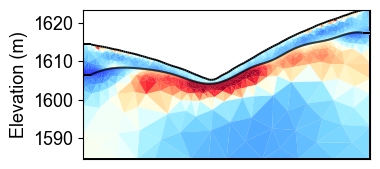

<Figure size 640x480 with 0 Axes>

In [6]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)
plt.rcParams["font.family"] = "Arial"

fixed_cmap = BlueDarkRed18_18.mpl_colormap
fig = plt.figure(figsize=[16, 6])

# Use tight_layout with adjusted parameters to reduce space
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# True resistivity model
for i in range(12):
    row, col = i // 4, i % 4
    ax = fig.add_subplot(3, 4, i+1)
    
    # Add common ylabel only to leftmost panels
    ylabel = "Elevation (m)" if col == 0 else None
    
    # Add resistivity label only to the middle-right panel (row 1, col 3)
    resistivity_label = ' Resistivity ($\Omega$ m)' if (i == 7) else None
    
    # Only show axis ticks on leftmost and bottom panels
    if col != 0:
        ax.set_yticks([])
    
    if row != 2:  # Not bottom row
        ax.set_xticks([])
    else:
        # Add "distance (m)" label to bottom row panels
        ax.set_xlabel("Distance (m)")
    
    # Create the plot
    ax, cbar = pg.show(result.mesh,
                      result.final_models[:,i][result.mesh.cellMarkers()],
                      pad=0.3,
                      orientation="vertical",
                      cMap=fixed_cmap,
                      cMin=100,
                      cMax=3000,
                      ylabel=ylabel,
                      label=resistivity_label,
                      ax=ax,
                      logScale=False,
                      coverage=result.all_coverage[i][result.mesh.cellMarkers()]>-1.2)
    if i ==0:
        ax.plot([40],[1607],'*',c='k')
        ax.plot([80],[1621],'*',c='k')

        ax.plot([30],[1604],'*',c='k')
        ax.plot([65],[1608],'*',c='k')
        
    # Only keep colorbar for the middle-right panel (row 1, col 3)
    # This corresponds to panel index 7 in a 0-based indexing system
    if i != 7:  # Keep only the colorbar for panel 7
        cbar.remove()

plt.tight_layout()